# TITANIC SURVIVAL PREDICTION 

***Import Modules***

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

***Read The data from csv file***

In [40]:
data = pd.read_csv("data/tested.csv")

***Data preprocessing***

In [41]:
# Remove unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing age values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing embarked values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Fill the missing fare values with median
data['Fare'].fillna(data['Fare'].median(), inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


***Encode categorical variables***

In [42]:
label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])

data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

***Split the data into features (X) and target (y)***

In [43]:
feature = data.drop('Survived', axis=1)

target = data['Survived']

***Split data into training and testing sets***

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

***Train a Random Forest Classifier***

In [45]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

***Make predictions on the test set***

In [46]:
y_pred = clf.predict(X_test)

***Evaluate the model***

In [47]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


***Feature importances***

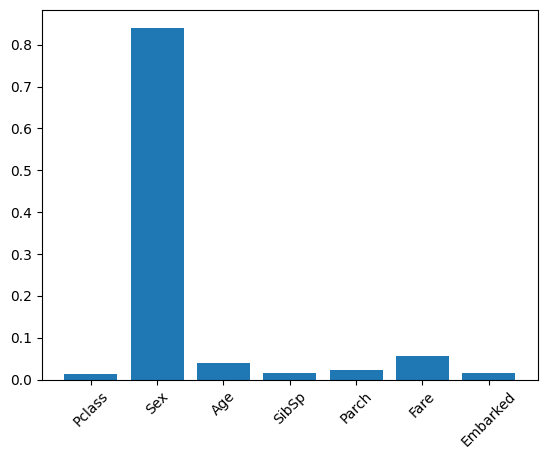

In [49]:
importances = clf.feature_importances_
features = feature.columns
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.show()